# Finalized Class Statistics

Finalized Class by Train-Test Split

In [1]:
# Packages
import pandas as pd
import os
import dataframe_image as dfi # NOTE: YOU MUST HAVE GOOGLE CHROME INSTALLED FOR THIS TO WORK CORRECTLY
import matplotlib.pyplot as plt

In [2]:
# Function for loading parquet files and loading the Class column
def combine_directory_parquets_read_class(directory_path):
    '''
    Combines all parquet files in a directory into a single dataframe.
    '''
    # If path does not end in a slash, add one
    if directory_path[-1] != '/':
        directory_path += '/'
    # list of files in directory
    file_list = [f for f in os.listdir(directory_path) if f.endswith('.parquet')]
    # read in all parquet files
    combined_df = pd.concat([pd.read_parquet(directory_path + f, columns=['Class']) for f in file_list])
    # Return combined dataframe
    return combined_df

## Load Data

In [3]:
train_data = combine_directory_parquets_read_class('../../../Data/Features/All Features/train/')
# Add column for 'Split' with value 'Train'
train_data['Split'] = 'Train'
train_data

,Class,Split
0,Sedan,Train
1,SUV,Train
2,Convertible,Train
3,Pickup,Train
4,SUV,Train
...,...,...
370,SUV,Train
371,Sedan,Train
372,Sedan,Train
373,Sedan,Train


In [4]:
test_data = combine_directory_parquets_read_class('../../../Data/Features/All Features/test/')
# Add column for 'Split' with value 'Test'
test_data['Split'] = 'Test'
test_data

,Class,Split
0,Pickup,Test
1,SUV,Test
2,Convertible,Test
3,Convertible,Test
4,Pickup,Test
...,...,...
88,Sedan,Test
89,Pickup,Test
90,Sedan,Test
91,Sedan,Test


## Stack Dataframes and Create Counts

In [5]:
# test_train_class_cnts = (pd.concat([train_data, test_data])
#                            .groupby(['Split', 'Class'])
#                            .size()
#                            .reset_index(name='Count')
#                            .sort_values(by=['Split', 'Class'], ascending=[False, True])
#                            # Add percent
#                            .assign(Percent = lambda x: (x['Count'] / x.groupby('Split')['Count'].transform('sum') * 100))
#                            .style
#                            .format(precision=2, thousands=",", decimal=".")
#                            .set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
#                            .set_properties(**{'text-align': 'center'})
#                            .hide(axis="index")
# )

# dfi.export(test_train_class_cnts, '../../../Output/Class Statistics/Finalized/test_train_class_cnts.png')

# # Output to Excel as well
# test_train_class_cnts.to_excel('../../../Output/Class Statistics/Finalized/test_train_class_cnts.xlsx', index=False)

# test_train_class_cnts

## Version with Class, Train, Test Columns

In [6]:
test_train_class_cnts = (pd.concat([train_data, test_data])
                            .groupby(['Class', 'Split'])
                            .size()
                            .unstack()
                            .fillna(0)
                            .astype(int)
                            # Flatten MultiIndex
                            .reset_index()
                            [['Class', 'Train', 'Test']]
                            .sort_values(by='Class')
                            .style
                            .format(precision=0, thousands=",", decimal=".")
                            .set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
                            .set_properties(**{'text-align': 'center'})
                            .hide(axis="index")
    )

dfi.export(test_train_class_cnts, '../../../Output/Class Statistics/Finalized/test_train_class_cnts.png')

# Output to Excel as well
test_train_class_cnts.to_excel('../../../Output/Class Statistics/Finalized/test_train_class_cnts.xlsx', index=False)

test_train_class_cnts

Class,Train,Test
Convertible,"1,140",279
Pickup,713,189
SUV,"1,616",441
Sedan,"2,534",580


## Updated Examples

In [13]:
# Get mapping to original location of images

# Function for loading parquet files and loading Class, harmonized_filename columns
def combine_directory_parquets_read_class_fn(directory_path):
    '''
    Combines all parquet files in a directory into a single dataframe.
    '''
    # If path does not end in a slash, add one
    if directory_path[-1] != '/':
        directory_path += '/'
    # list of files in directory
    file_list = [f for f in os.listdir(directory_path) if f.endswith('.parquet')]
    # read in all parquet files
    combined_df = pd.concat([pd.read_parquet(directory_path + f, columns=['Class', 'harmonized_filename']) for f in file_list])
    # Return combined dataframe
    return combined_df

In [14]:
train_data = combine_directory_parquets_read_class_fn('../../../Data/Features/All Features/train/')
test_data = combine_directory_parquets_read_class_fn('../../../Data/Features/All Features/test/')
# Combine train and test data
all_data_class_fns = pd.concat([train_data, test_data])
# Parse original filename
# Split on _orig_ and keep the second part
all_data_class_fns['Original_Filename'] = all_data_class_fns['harmonized_filename'].str.split('_orig_').str[1]
# Split on _resized and keep the first part
all_data_class_fns['Original_Filename'] = all_data_class_fns['Original_Filename'].str.split('_resized').str[0]
# replace _ with /
all_data_class_fns['Original_Filename'] = all_data_class_fns['Original_Filename'].str.replace('_', '/')
# Add .jpg to end
all_data_class_fns['Original_Filename'] = all_data_class_fns['Original_Filename'] + '.jpg'
# Replace train with cars_train/cars_train and test with cars_test/cars_test
all_data_class_fns['Original_Filename'] = all_data_class_fns['Original_Filename'].str.replace('train/', 'cars_train/cars_train/')
all_data_class_fns['Original_Filename'] = all_data_class_fns['Original_Filename'].str.replace('test/', 'cars_test/cars_test/')
all_data_class_fns

,Class,harmonized_filename,Original_Filename
0,Sedan,Sedan_train_orig_test_01516_resized.jpg,cars_test/cars_test/01516.jpg
1,SUV,SUV_train_orig_train_00294_resized.jpg,cars_train/cars_train/00294.jpg
2,Convertible,Convertible_train_orig_train_04236_resized.jpg,cars_train/cars_train/04236.jpg
3,Pickup,Pickup_train_orig_train_03906_resized.jpg,cars_train/cars_train/03906.jpg
4,SUV,SUV_train_orig_test_01344_resized.jpg,cars_test/cars_test/01344.jpg
...,...,...,...
88,Sedan,Sedan_test_orig_test_03443_resized.jpg,cars_test/cars_test/03443.jpg
89,Pickup,Pickup_test_orig_train_04088_resized.jpg,cars_train/cars_train/04088.jpg
90,Sedan,Sedan_test_orig_train_03673_resized.jpg,cars_train/cars_train/03673.jpg
91,Sedan,Sedan_test_orig_train_06616_resized.jpg,cars_train/cars_train/06616.jpg


In [15]:
# Sample images - 5 from each class
sample_images = all_data_class_fns.groupby('Class').apply(lambda x: x.sample(5)).reset_index(drop=True)
sample_images

,Class,harmonized_filename,Original_Filename
0,Convertible,Convertible_train_orig_train_05144_resized.jpg,cars_train/cars_train/05144.jpg
1,Convertible,Convertible_train_orig_test_04764_resized.jpg,cars_test/cars_test/04764.jpg
2,Convertible,Convertible_train_orig_train_00081_resized.jpg,cars_train/cars_train/00081.jpg
3,Convertible,Convertible_train_orig_train_01360_resized.jpg,cars_train/cars_train/01360.jpg
4,Convertible,Convertible_train_orig_test_07920_resized.jpg,cars_test/cars_test/07920.jpg
5,Pickup,Pickup_train_orig_train_00597_resized.jpg,cars_train/cars_train/00597.jpg
6,Pickup,Pickup_train_orig_test_03533_resized.jpg,cars_test/cars_test/03533.jpg
7,Pickup,Pickup_train_orig_train_06547_resized.jpg,cars_train/cars_train/06547.jpg
8,Pickup,Pickup_train_orig_train_06464_resized.jpg,cars_train/cars_train/06464.jpg
9,Pickup,Pickup_train_orig_train_04999_resized.jpg,cars_train/cars_train/04999.jpg


In [17]:
# Iterate over each of the top 5 classes
# Load and print images
import matplotlib.pyplot as plt
loaded_images = []
loaded_image_classes = []
for i in range(len(sample_images)):
    img = plt.imread(os.path.expanduser('~/Box/INFO 290T Project/Raw Data/Stanford Car Dataset/') + sample_images['Original_Filename'].iloc[i])
    loaded_images.append(img)
    loaded_image_classes.append(sample_images['Class'].iloc[i])

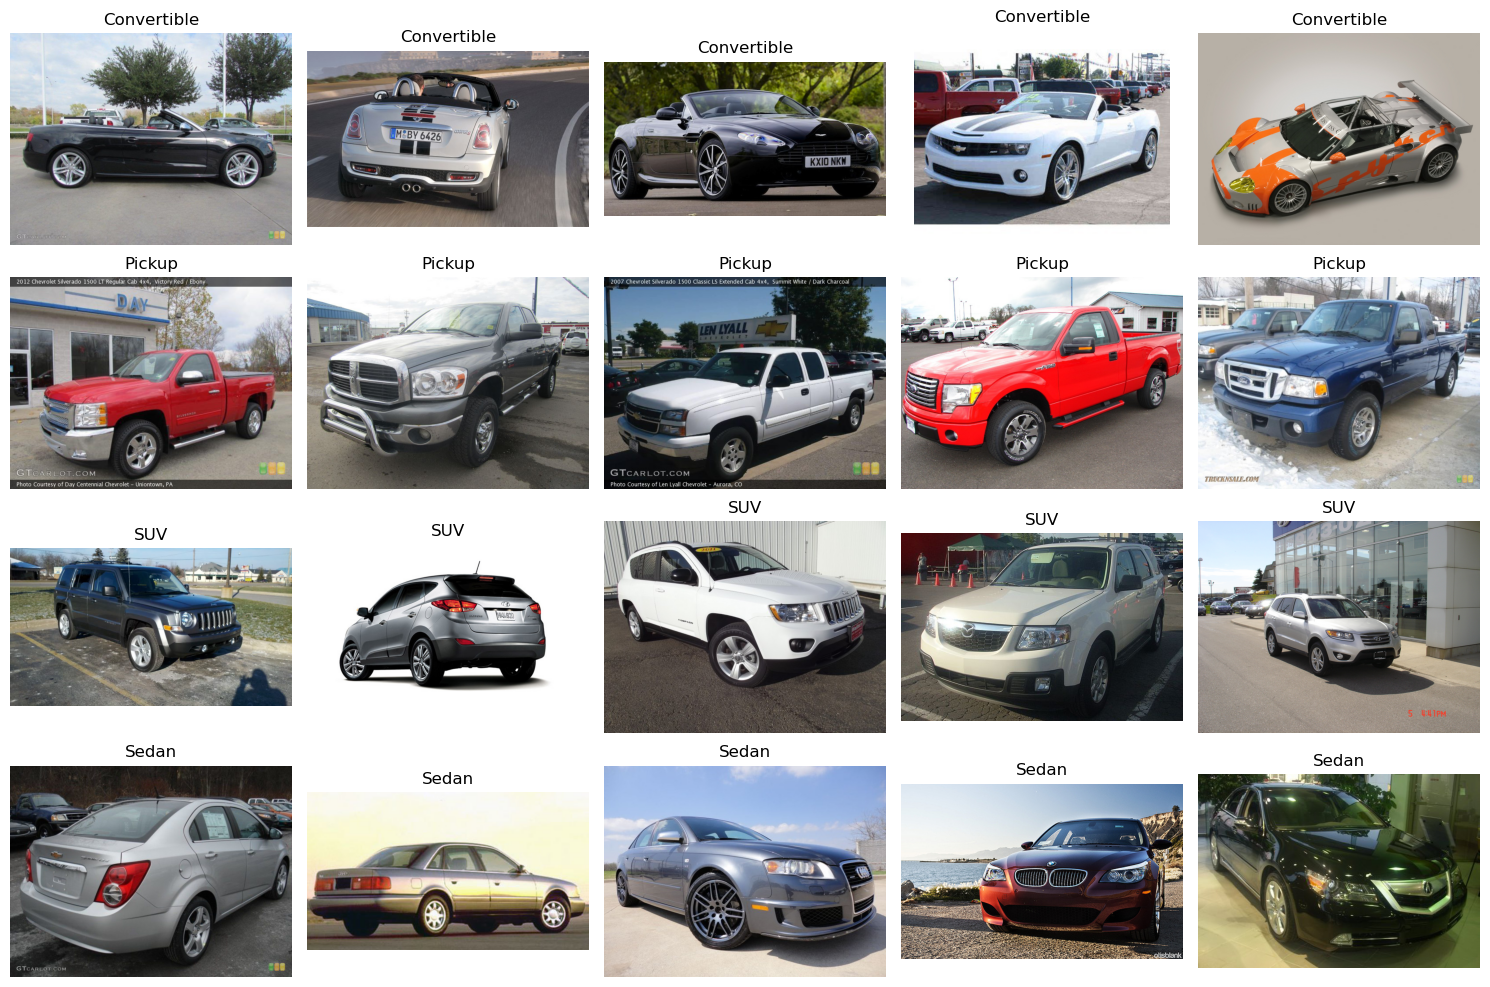

In [22]:
# Use loaded images and loaded image classes to tiled figure
# Label each row with the class
fig, ax = plt.subplots(4, 5, figsize=(15, 10))
for i in range(4):
    for j in range(5):
        ax[i, j].imshow(loaded_images[i * 5 + j])
        ax[i, j].set_title(loaded_image_classes[i * 5 + j])
        ax[i, j].axis('off')
plt.tight_layout()
plt.savefig('../../../Output/Class Statistics/Finalized/Class Sample Images.png', bbox_inches='tight')
plt.show()